In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from scipy.sparse.linalg import LinearOperator, cg, lsqr

import pylops
from pylops.utils                      import dottest
from pylops.utils.wavelets             import *
from pylops.optimization.sparsity  import *


In [2]:
# EXPERIMENT PARAMS
from pyfrac.hydrafrac.acquisition import recgeom,rec2das_datatrnsfrm,dasgeom

# LOCATION
from pyfrac.pseudodas.receiveroperators import cubePDoperator
from pyfrac.imaging.kirchhoff import Kirchhoff
from pyfrac.utils.localisationutils import get_max_locs

# VISUALISATION
from pyfrac.visualisation.traceviz import traceimage, wiggleplot
from pyfrac.visualisation.eventimages import locimage3d

# MAKE DATA

In [3]:
das_fs = 10000
opt_fs = 125000

field_fwav = 20  # WAVELET CENTRAL FREQUENCY
lab_fwav = 25000  # WAVELET CENTRAL FREQUENCY
nt = 251  # TIME SAMPLES


das_dt = 1/das_fs
opt_dt = 1/opt_fs

field_t = np.arange(10*nt)*das_dt
lab_t = np.arange(nt)*das_dt
opt_t = np.arange(nt)*opt_dt

In [4]:
fw, fwt, fwc = ricker(field_t, f0=field_fwav)
lw, lwt, lwc = ricker(lab_t[:11], f0=lab_fwav)
ow, owt, owc = ricker(opt_t[:11], f0=lab_fwav)

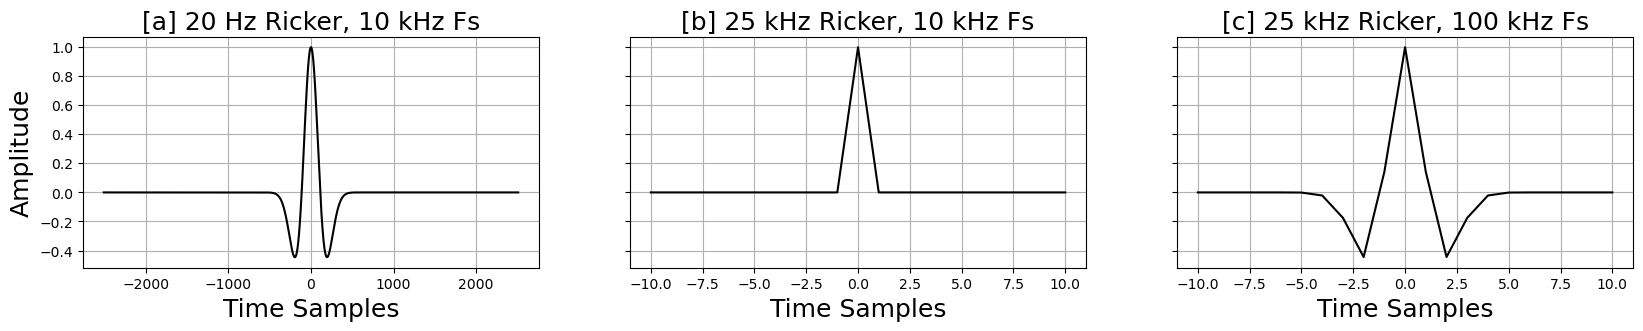

In [15]:
fig,axs = plt.subplots(1,3,figsize=[20,3], sharey=True)
axs[0].plot(0.5 + np.arange(len(fw))-0.5*len(fw), fw, 'k')
axs[1].plot(0.5 + np.arange(len(lw))-0.5*len(lw), lw, 'k')
axs[2].plot(0.5 + np.arange(len(ow))-0.5*len(ow), ow, 'k')

axs[0].set_ylabel('Amplitude',fontsize=18)
for ax in axs:
    ax.grid()
    ax.set_xlabel('Time Samples',fontsize=18)
axs[0].set_title('[a] 20 Hz Ricker, 10 kHz Fs',fontsize=18)
axs[1].set_title('[b] 25 kHz Ricker, 10 kHz Fs',fontsize=18)
axs[2].set_title('[c] 25 kHz Ricker, 100 kHz Fs',fontsize=18)
plt.savefig('./Figures/RickerFreqAnalysisSubplots.png')

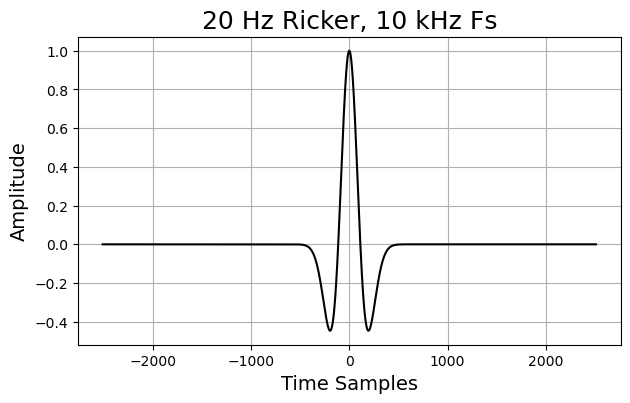

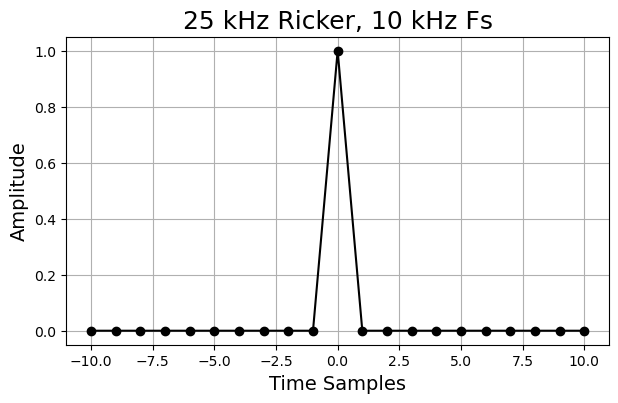

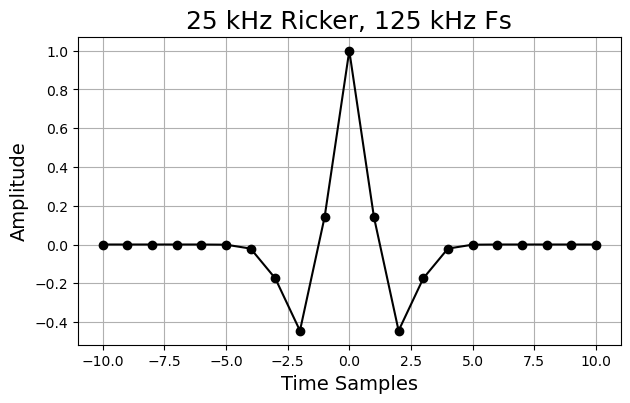

In [14]:
fig,ax = plt.subplots(1,1,figsize=[7,4])
ax.plot(0.5 + np.arange(len(fw))-0.5*len(fw), fw,'k')
ax.set_title('20 Hz Ricker, 10 kHz Fs',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=14)
ax.grid()
ax.set_xlabel('Time Samples',fontsize=14)
plt.savefig('./Figures/20HzFc_10kHzFs.png')

fig,ax = plt.subplots(1,1,figsize=[7,4])
ax.plot(0.5 + np.arange(len(lw))-0.5*len(lw), lw, 'k-o')
ax.set_title('25 kHz Ricker, 10 kHz Fs',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=14)
ax.grid()
ax.set_xlabel('Time Samples',fontsize=14)
plt.savefig('./Figures/25kHzFc_10kHzFs.png')

fig,ax = plt.subplots(1,1,figsize=[7,4])
ax.plot(0.5 + np.arange(len(ow))-0.5*len(ow), ow, 'k-o')
ax.set_title('25 kHz Ricker, 125 kHz Fs',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=14)
ax.grid()
ax.set_xlabel('Time Samples',fontsize=14)
plt.savefig('./Figures/25kHzFc_125kHzFs.png')


# axs[1].plot(0.5 + np.arange(len(lw))-0.5*len(lw), lw,)
# axs[2].plot(0.5 + np.arange(len(ow))-0.5*len(ow), ow,)

# axs[0].set_ylabel('Amplitude',fontsize=18)
# for ax in axs:
#     ax.grid()
#     ax.set_xlabel('Time Samples',fontsize=18)
# axs[0].set_title('[a] 20 Hz Ricker, 10 kHz Fs',fontsize=18)
# axs[1].set_title('[b] 25 kHz Ricker, 10 kHz Fs',fontsize=18)
# axs[2].set_title('[c] 25 kHz Ricker, 100 kHz Fs',fontsize=18)